In [30]:
import alphaspace2 as al
import mdtraj
import numpy as np
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import fcluster, linkage
from alphaspace2.functions import _binCluster, _group
from alphaspace2.Cluster import _DPocket

### We load the methods for calculating the molecular features 

In [31]:
import features  ## python module with pseudomolecular features
import glob
from collections import defaultdict 
import matplotlib.pyplot as plt

### For this tutorial, I apply ensemble pockets and pocket features to compare the binding site of three different disease relevant systens; HIV-Proteases, Protein-Kinase A, and Estrogen Receptor
#### A representative ligand composed of all the ligands from the ensemble of structures was used to define the contact pockets to be compared

In [32]:
protease_list = ['1c70','1hvi','1hvj','1izh','1pro','1siv','2i0a','2psv','2q5k','3lzu']

In [33]:
pka_list = ['1sve','1xh5','2c1a','2erz','2f7e','2f7x','2gfc','2jds','2oh0','2vo7']

In [34]:
er_list = ['2b1z','2p15','2pog','2q70','2yja','3uud','4mg8','4pps','4pxm','4tv1']

### Calculating pockets for proteases, pka, and estrogen receptor 


In [35]:
lig = mdtraj.load('Binding_Site_comparison/protease/representative_ligand.pdb')
protease_data_ss = {}
protease_data_prot = {}
for pdb_id in protease_list:
    prot = mdtraj.load('Binding_Site_comparison/protease/protein_' + pdb_id + '.pdb')
    protease_data_prot[pdb_id] = prot
    ss_prot = al.Snapshot()
    ss_prot.run(prot, lig)
    protease_data_ss[pdb_id] = ss_prot
    

In [36]:
lig = mdtraj.load('Binding_Site_comparison/pka/representative_ligand.pdb')
pka_data_ss = {}
pka_data_prot = {}
for pdb_id in pka_list:
    prot = mdtraj.load('Binding_Site_comparison/pka/protein_' + pdb_id + '.pdb')
    pka_data_prot[pdb_id] = prot
    ss_prot = al.Snapshot()
    ss_prot.run(prot, lig)
    pka_data_ss[pdb_id] = ss_prot

In [37]:
lig = mdtraj.load('Binding_Site_comparison/estrogen_receptor/representative_ligand.pdb')
er_data_ss = {}
er_data_prot = {}
for pdb_id in er_list:
    prot = mdtraj.load('Binding_Site_comparison/estrogen_receptor/protein_' + pdb_id + '.pdb')
    er_data_prot[pdb_id] = prot
    ss_prot = al.Snapshot()
    ss_prot.run(prot, lig)
    er_data_ss[pdb_id] = ss_prot

### Calculating ensemble pockets for proteases, pka, and estrogen receptor systems
#### Also extracting contact pockets and calculating USR and occluded ASA properties 

In [38]:
protease_trajectory = al.Trajectory(snapshots=[protease_data_ss[pdb_id] for pdb_id in protease_data_ss.keys()])
protease_trajectory.gen_dpockets(clust_distance=4.7)
dps = sorted([dp for dp in protease_trajectory.dpockets],key=lambda i:sum(i.scores))

protease_contact_pockets = defaultdict(dict)
for dpx,dp in enumerate(dps):
    pockets = list(dp.pockets)
    for px,pdb_id in enumerate(protease_data_ss.keys()):
        if pockets[px].isContact:
            protease_contact_pockets[pdb_id][dpx] = np.array([b.xyz for b in pockets[px].betas])
            
protease_props_dict = {}
for pdb_id in protease_contact_pockets:
    contact_betas = []
    prot = protease_data_prot[pdb_id]
    for dpx in protease_contact_pockets[pdb_id]:
        contact_betas.extend(protease_contact_pockets[pdb_id][dpx])
    
    contact_betas = np.array(contact_betas)
    beta_temp_dict = {}
    beta_temp_dict['occluded_asa'] = features._get_pharmacophore_fingerprint(prot,contact_betas)
    beta_temp_dict['usr'] = features._Get_USR_alpha_beta(contact_betas)
    protease_props_dict[pdb_id] = beta_temp_dict 

In [39]:
er_trajectory = al.Trajectory(snapshots=[er_data_ss[pdb_id] for pdb_id in er_data_ss.keys()])
er_trajectory.gen_dpockets(clust_distance=4.7)
dps = sorted([dp for dp in er_trajectory.dpockets],key=lambda i:sum(i.scores))

er_contact_pockets = defaultdict(dict)
for dpx,dp in enumerate(dps):
    pockets = list(dp.pockets)
    for px,pdb_id in enumerate(er_data_ss.keys()):
        if pockets[px].isContact:
            er_contact_pockets[pdb_id][dpx] = np.array([b.xyz for b in pockets[px].betas])

er_props_dict = {}
for pdb_id in er_contact_pockets:
    contact_betas = []
    prot = er_data_prot[pdb_id]
    for dpx in er_contact_pockets[pdb_id]:
        contact_betas.extend(er_contact_pockets[pdb_id][dpx])
    
    contact_betas = np.array(contact_betas)
    beta_temp_dict = {}
    beta_temp_dict['occluded_asa'] = features._get_pharmacophore_fingerprint(prot,contact_betas)
    beta_temp_dict['usr'] = features._Get_USR_alpha_beta(contact_betas)
    er_props_dict[pdb_id] = beta_temp_dict

In [40]:
pka_trajectory = al.Trajectory(snapshots=[pka_data_ss[pdb_id] for pdb_id in pka_data_ss.keys()])
pka_trajectory.gen_dpockets(clust_distance=4.7)
dps = sorted([dp for dp in pka_trajectory.dpockets],key=lambda i:sum(i.scores))

pka_contact_pockets = defaultdict(dict)
for dpx,dp in enumerate(dps):
    pockets = list(dp.pockets)
    for px,pdb_id in enumerate(pka_data_ss.keys()):
        if pockets[px].isContact:
            pka_contact_pockets[pdb_id][dpx] = np.array([b.xyz for b in pockets[px].betas])

pka_props_dict = {}
for pdb_id in pka_contact_pockets:
    contact_betas = []
    prot = pka_data_prot[pdb_id]
    for dpx in pka_contact_pockets[pdb_id]:
        contact_betas.extend(pka_contact_pockets[pdb_id][dpx])
    
    contact_betas = np.array(contact_betas)
    beta_temp_dict = {}
    beta_temp_dict['occluded_asa'] = features._get_pharmacophore_fingerprint(prot,contact_betas)
    beta_temp_dict['usr'] = features._Get_USR_alpha_beta(contact_betas)
    pka_props_dict[pdb_id] = beta_temp_dict

### Define an array of USR features for the heatmap comparison 

In [41]:
usr_arrays = []
for pdb_id in protease_contact_pockets:
    usr_arrays.append([s for _,s in protease_props_dict[pdb_id]['usr'].items()])
for pdb_id in er_contact_pockets:
    usr_arrays.append([s for _,s in er_props_dict[pdb_id]['usr'].items()])
for pdb_id in pka_contact_pockets:
    usr_arrays.append([s for _,s in pka_props_dict[pdb_id]['usr'].items()])
        

In [ ]:
usr_heatmap = np.ones((30,30))
for ix in range(len(usr_arrays)-1):
    usr_b1 = usr_arrays[ix]
    for jx in range(ix+1,len(usr_arrays)):
        usr_b2 = usr_arrays[jx]
        sim = 1 - features._soergel(usr_b1,usr_b2)
        usr_heatmap[ix,jx] = sim
        usr_heatmap[jx,ix] = sim    
a = 1

### Plotting heatmap similarities using the USR features
#### We define vmin as 0.7 (from observation of large numbers of structures,
#### We observe that a similarity of <0.7 may be defined as dissimilar while anything larger than 0.7 may be similar)

### Set the figure font and size

In [21]:
from matplotlib.font_manager import FontProperties
custom_font = FontProperties(fname='./font/Roobert-Regular.ttf', size=12)
plt.figure(figsize=(10,10), dpi=300)

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

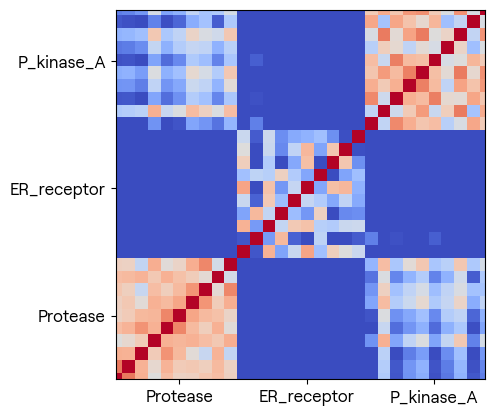

In [28]:
plt.imshow(usr_heatmap, cmap='coolwarm', vmin = 0.7, vmax = 1.0)
plt.xticks([5,15,25],['Protease','ER_receptor','P_kinase_A'], rotation=0, fontproperties=custom_font)
plt.yticks([5,15,25],['Protease','ER_receptor','P_kinase_A'], fontproperties=custom_font)
plt.axis([0,29,0,29])
plt.savefig('./result/USR_heatmap.png')
# plt.show()

#### Proteases are more similar to each other with some pka's having similar shapes to the protease beta clusters. Estrogen receptors form more distinct shapes that are dissimilar to either proteases or pka 

### For the occluded ASA similarity

In [ ]:
oasa_arrays = []
for pdb_id in protease_contact_pockets:
    oasa_arrays.append([s for _,s in protease_props_dict[pdb_id]['occluded_asa'].items()])
for pdb_id in er_contact_pockets:
    oasa_arrays.append([s for _,s in er_props_dict[pdb_id]['occluded_asa'].items()])
for pdb_id in pka_contact_pockets:
    oasa_arrays.append([s for _,s in pka_props_dict[pdb_id]['occluded_asa'].items()])

In [ ]:
oasa_heatmap = np.ones((30,30))
for ix in range(len(oasa_arrays)-1):
    oasa_b1 = oasa_arrays[ix]
    for jx in range(ix+1,len(oasa_arrays)):
        oasa_b2 = oasa_arrays[jx]
        sim = 1 - features._soergel(oasa_b1,oasa_b2)
        oasa_heatmap[ix,jx] = sim
        oasa_heatmap[jx,ix] = sim    

In [ ]:
plt.imshow(oasa_heatmap, cmap='cool', vmin = 0.7, vmax = 1.0)
plt.xticks([5,15,25],['Protease','ER_receptor','P_kinase_A'],rotation=0)
plt.yticks([5,15,25],['Protease','ER_receptor','P_kinase_A'])
plt.axis([0,29,0,29])
plt.show()

#### Similarity/dissimilarity is more distint for oasa metric and we can observe differences within each cluster more visibly